In [62]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import librosa

In [63]:
def show_plot_snr(title, noisy, original):
    plt.figure(title, figsize=(4, 3), dpi=100)
    plt.axis('off')
    plt.title(title)
    plt.plot(noisy, label="Noisy")
    plt.plot(original, label="Original")
    plt.legend()
    plt.savefig(title + ".png", dpi=100, bbox_inches="tight")
    plt.show()

In [64]:
def show_plot_denoised(title, denoised, original):
    plt.figure(title, figsize=(4, 3), dpi=100)
    plt.axis('off')
    plt.title(title)
    plt.plot(denoised, label="Denoised")
    plt.plot(original, label="Original")
    plt.legend()
    plt.savefig(title + ".png", dpi=100, bbox_inches="tight")
    plt.show()

In [77]:
def show_scatter_distance(title, denoised, noisy, db_vals):
    plt.figure(title, figsize=(4, 3), dpi=100)
    plt.title(title)
    plt.scatter(db_vals, denoised, c ='red', label='Denoised')
    plt.scatter(db_vals, noisy, c ='blue', label='Noisy')
    plt.xlabel("dB")
    plt.ylabel("Distance")
    plt.legend()
    plt.savefig(title + ".png", dpi=100, bbox_inches="tight")
    plt.show()

In [66]:
def distance(m1, m2):
    ans = 0.0
    smallest = min(len(m1), len(m2))
    m1 = m1[:smallest]
    m2 = m2[:smallest]
    for i, j in zip(m1, m2):
        ans += (i - j) * (i - j)
    return ans

In [67]:
def get_snr_db(music, noise):
    music_power = np.var(music)
    noise_power = np.var(noise)
    return 10*np.log10(music_power / noise_power)

In [68]:
def get_sigma_from_snr_db(snr_db, music):
    x = np.log10(np.var(music))
    y = snr_db / 10
    return 10 ** ((x-y)/2)

In [69]:
fs0, music = wavfile.read("music.wav")
fs1, noise1 = wavfile.read("noise1.wav")
fs2, noise2 = wavfile.read("noise2.wav")
fs3, noise3 = wavfile.read("noise3.wav")

In [70]:
db_vals = [0.0, 5.0, 10.0, 15.0, 20.0, 25.0] # some db values

In [71]:
noise_1_sigma = np.sqrt(np.var(noise1))
noise_2_sigma = np.sqrt(np.var(noise2))
noise_3_sigma = np.sqrt(np.var(noise3))
noise_sigma = [[noise1, noise_1_sigma, fs1], [noise2, noise_2_sigma, fs2], [noise3, noise_3_sigma, fs2]]

In [72]:
denoised_distance = [[], [], []]
noisy_distance = [[], [], []]

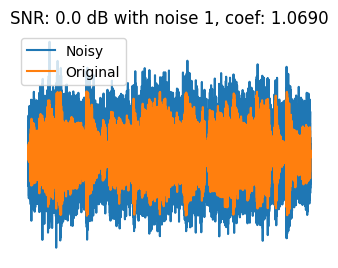

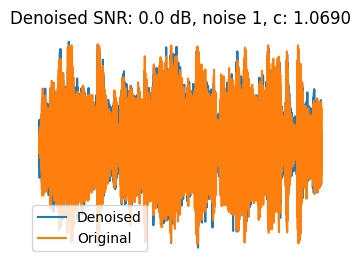

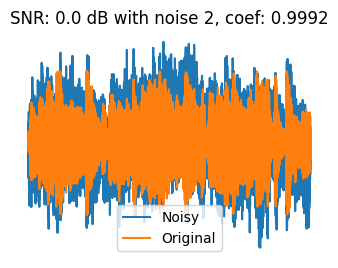

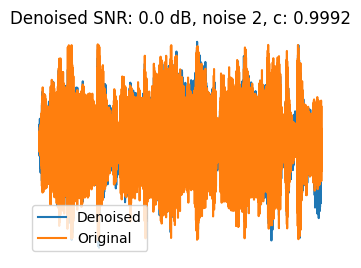

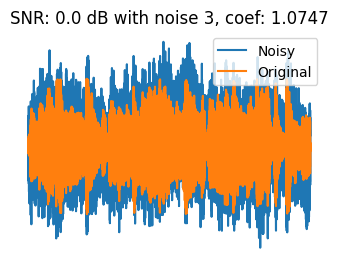

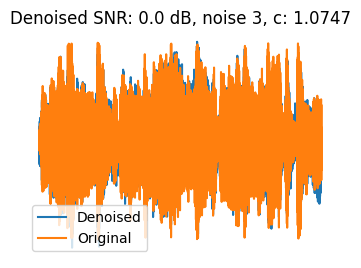

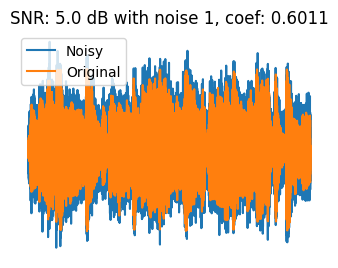

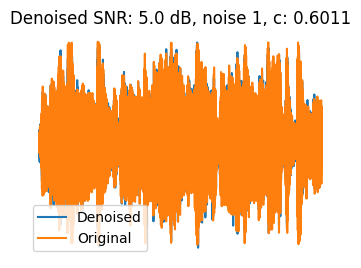

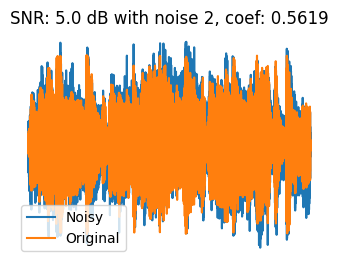

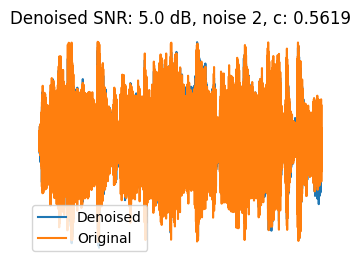

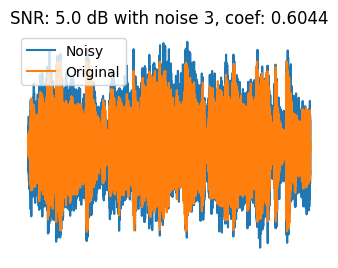

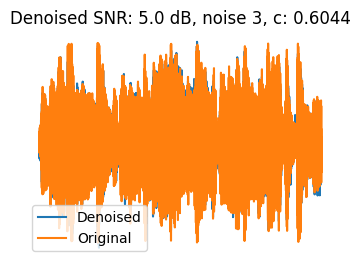

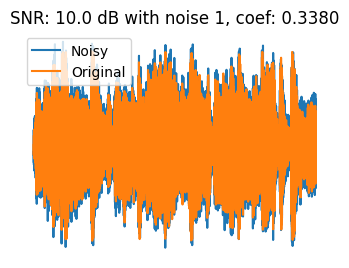

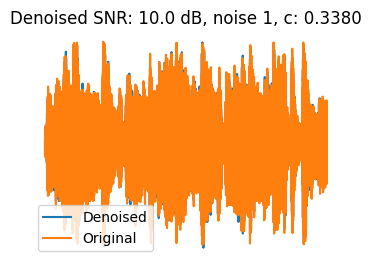

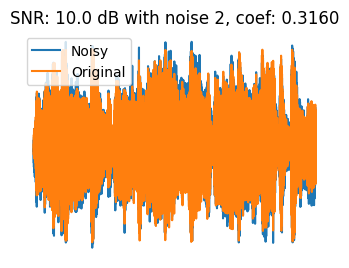

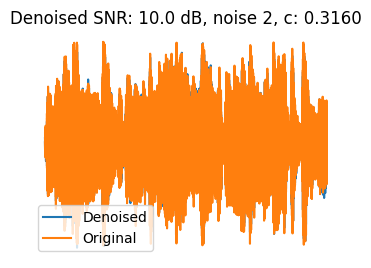

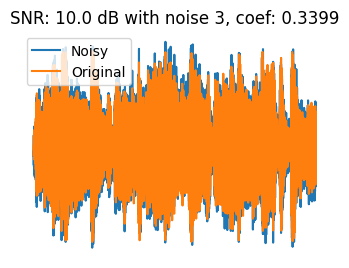

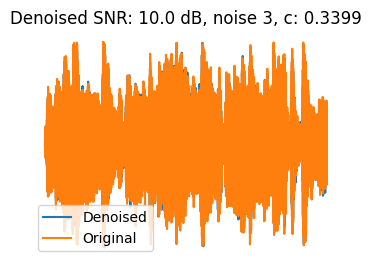

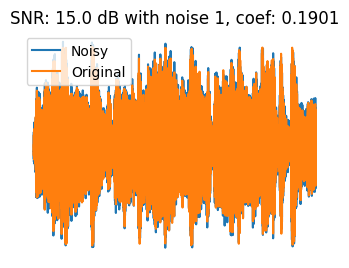

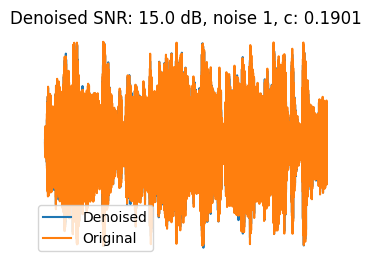

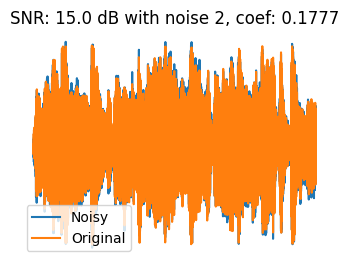

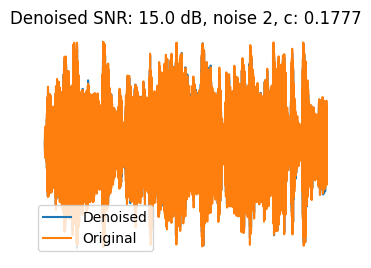

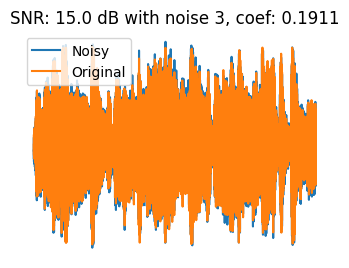

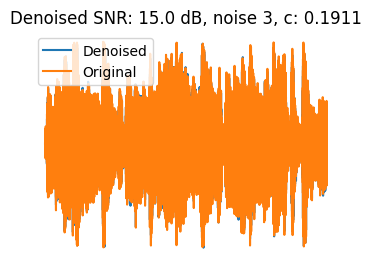

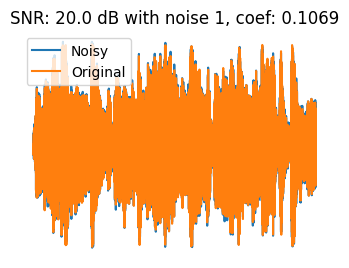

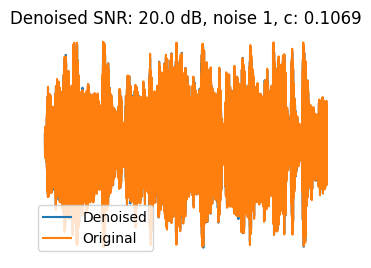

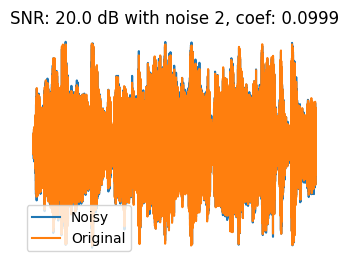

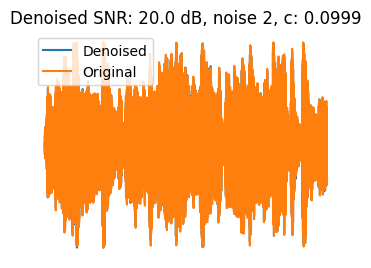

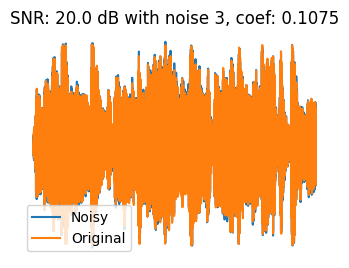

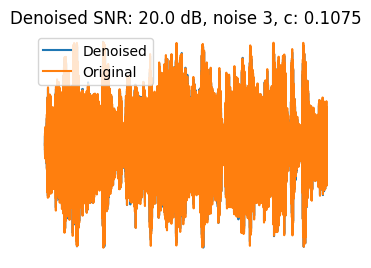

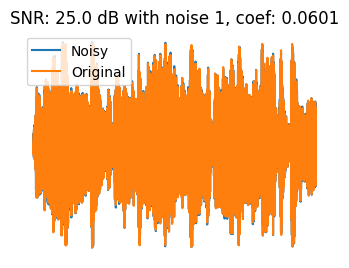

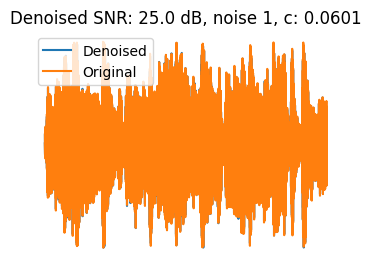

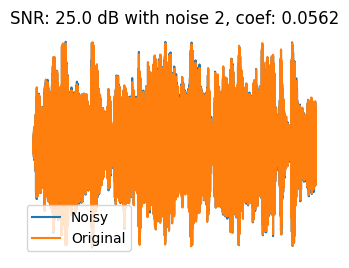

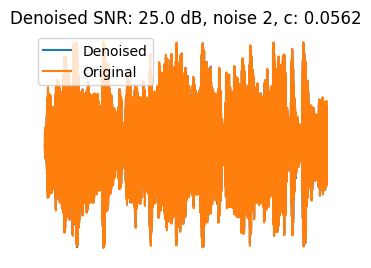

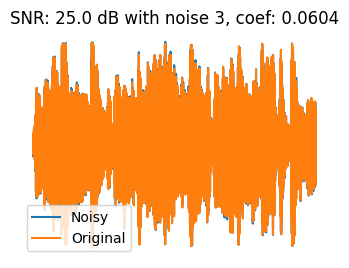

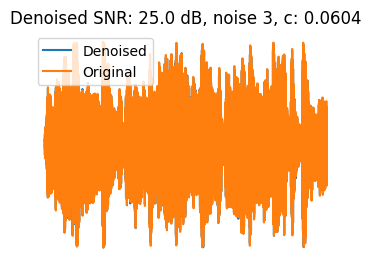

In [73]:
for db in db_vals:
    count = 0
    for noise in noise_sigma:
        count += 1
        needed_noise = get_sigma_from_snr_db(db, music)
        coef = needed_noise / noise[1] # noise[1]: sqrt of the variance of noise.wav data
        coef_noise = coef * noise[0] # noise[0]: noise .wav data
        noisy_music = music + coef_noise
        
        coef = "{:.4f}".format(coef)
        
        noisy_distance[count-1].append(distance(noisy_music, music))
        
        wavfile.write("SNR_" + str(db) + "_dB_noise_" + str(count) + "_coef_" + coef + ".wav", noise[2], noisy_music)
        show_plot_snr("SNR: " + str(db) + " dB with noise " + str(count) + ", coef: " + coef, noisy_music, music)
        
        s = librosa.stft(noisy_music)    # Short-time Fourier transform
        ss = np.abs(s)         # get magnitude
        angle = np.angle(s)    # get phase
        b = np.exp(1.0j* angle) # use this phase information when Inverse Transform

        ns = librosa.stft(coef_noise) 
        nss = np.abs(ns)
        mns = np.mean(nss, axis=1) # get mean
        
        
        # subtract noise spectral mean from input spectral, and istft (Inverse Short-Time Fourier Transform)
        sa = ss - mns.reshape((mns.shape[0],1))  # reshape for broadcast to subtract
        sa0 = sa * b  # apply phase information
        y = librosa.istft(sa0) # back to time domain signal
            
        denoised_distance[count-1].append(distance(y, music))

        wavfile.write("denoised_SNR_" + str(db) + "_dB_noise_" + str(count) + "_coef_" + coef + ".wav", noise[2], y)
        show_plot_denoised("Denoised SNR: " + str(db) + " dB, noise " + str(count) + ", c: " + coef, y, music)

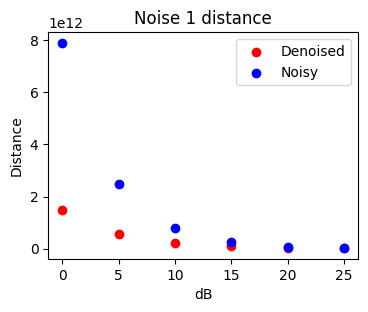

In [78]:
show_scatter_distance("Noise 1 distance", denoised_distance[0], noisy_distance[0], db_vals)

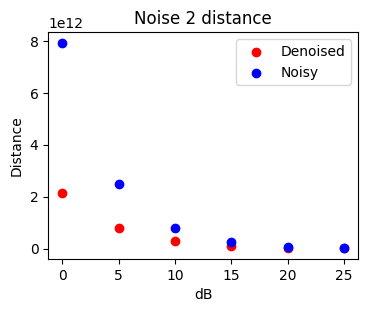

In [79]:
show_scatter_distance("Noise 2 distance", denoised_distance[1], noisy_distance[1], db_vals)

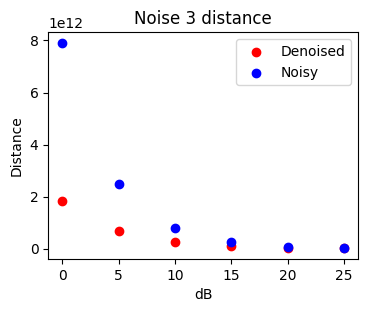

In [80]:
show_scatter_distance("Noise 3 distance", denoised_distance[2], noisy_distance[2], db_vals)